In [200]:
import os
import glob
import warnings
import h5py as h5
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from copy import deepcopy
from tqdm.auto import tqdm
from IPython.core.display import display, HTML

from gensit.config import Config
from gensit.inputs import Inputs
from gensit.outputs import Outputs
from gensit.utils.misc_utils import *
from gensit.utils.math_utils import *

from gensit.utils.probability_utils import *
from gensit.contingency_table import instantiate_ct
from gensit.contingency_table.ContingencyTable_MCMC import ContingencyTableMarkovChainMonteCarlo

from gensit.config import Config
from gensit.inputs import Inputs
from gensit.utils.misc_utils import *
from gensit.static.plot_variables import *
from gensit.static.global_variables import *
from gensit.outputs import Outputs,OutputSummary


# LaTeX font configuration
mpl.rcParams.update(LATEX_RC_PARAMETERS)

/tmp/ipykernel_987083/783910569.py:12: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [6]:
%matplotlib inline

# AUTO RELOAD EXTERNAL MODULES
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot

In [389]:
datapath = "../data/outputs/cambridge_work_commuter_lsoas_to_msoas/exp1/paper_figures/figure2/cumulative_srmse_and_cp_by_method_label_title&sigma_marker_sigma_markersize_table_coverage_probability_size_linewidth_1.0_colour_title_opacity_1.0_hatchopacity_1.0"
srmseoutputpath ="../data/outputs/cambridge_work_commuter_lsoas_to_msoas/exp1/paper_figures/figure2_v2/cumulative_srmse_by_method_label_title&sigma_marker_sigma_markersize_table_coverage_probability_size_linewidth_1.0_colour_title_opacity_1.0_hatchopacity_1.0"
cpoutputpath ="../data/outputs/cambridge_work_commuter_lsoas_to_msoas/exp1/paper_figures/figure2_v2/cumulative_cp_by_method_label_title&sigma_marker_sigma_markersize_table_coverage_probability_size_linewidth_1.0_colour_title_opacity_1.0_hatchopacity_1.0"

In [390]:
data = read_json(datapath+'_data.json')
settings = read_json(datapath+'_settings.json')

In [391]:
slice_vals = ['$\\mathbf{T}_{+\\cdot}$, $\\sigma = 0.014$',
'$\\mathbf{T}_{+\\cdot},\\mathbf{T}_{\\cdot +},\\mathbf{T}_{\\mathcal{X}_2}$, $\\sigma = 0.014$']
slice_key = 'label'
slice_index = []
for i,v in enumerate(data[slice_key]):
    if v in slice_vals and ('Disjoint' not in data['label'][i]):
        slice_index.append(i)

In [392]:
# index2 = []
# for i,v in enumerate(data['label']):
#     if v == '$\\mathbf{T}_{+\\cdot},\\mathbf{T}_{\\cdot +}$, $\\sigma = 0.014$' and data['x'][i][0] == '\zachosframeworktag':
#         index2.append(i)

In [393]:
data_slice = deepcopy(data)
for k in [j for j in data.keys() if j not in ['outputs','x_group','y_group','z_group','annotate','hatch']]:
    data_slice[k] = np.array(data_slice[k])[slice_index].tolist()
data_slice['newlabel'] = np.array(data_slice['x'])[:,0].tolist()
data_slice['newx'] = np.array(data_slice['x'])[:,1].tolist()
for k,v in data_slice.items():
    print(k,np.shape(v))

x (36, 2)
y (36, 2)
z (36, 2, 0)
x_group (0,)
y_group (0,)
z_group (0,)
marker_size (36,)
line_width (36,)
line_style (36,)
colour (36,)
opacity (36,)
hatch_opacity (36,)
zorder (36,)
annotate ()
label (36,)
marker (36,)
hatch ()
outputs ()
newlabel (36,)
newx (36,)


In [408]:
fontsize = 30

0 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
1 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
2 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
3 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
4 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
5 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
6 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
7 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
8 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
9 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
10 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
11 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
12 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;Joint (\frameworktag)
13 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\ma

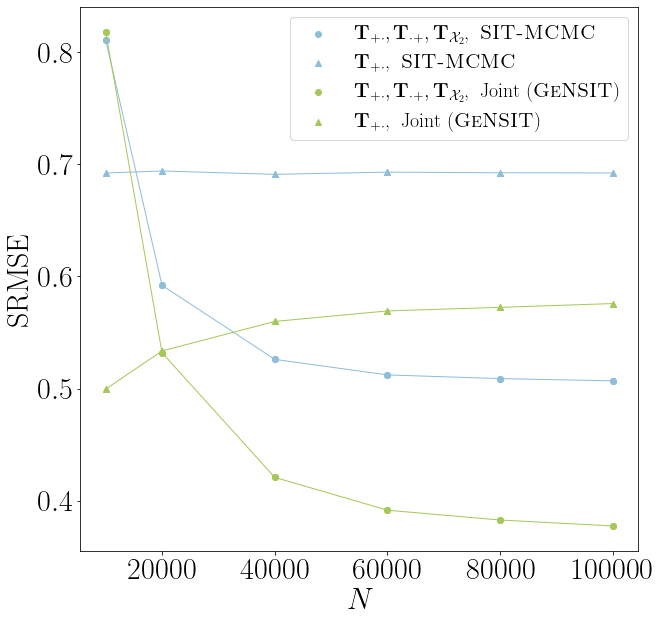

In [413]:
fig,ax = plt.subplots(figsize=settings['figure_size'])
cs = ['#8ebeda', '#8ebeda', '#a6c858', '#a6c858']#'#8ebeda' '#a6c858', '#ca4a58', '#e0ad41'
markers = ['o','^','o','^']
for jindx, j in enumerate(list(range(0,len(cs)*6,6))):
    # print(jindx,(j,j+6))
    for i in range(j,j+6):
        print(i,(data_slice['label'][i]+', \;'+data_slice['newlabel'][i]).replace(", $\\sigma = 0.014$",""))
        _ = ax.scatter(
            list(map(int,data_slice['newx']))[i],
            np.array(data_slice['y'][i])[0],
            linewidth = 1.0,
            alpha=1.0,
            c = cs[jindx],
            marker = markers[jindx],
            label = (data_slice['label'][i]+', \;'+data_slice['newlabel'][i]).replace(", $\\sigma = 0.014$",""),
        )
    _ = ax.plot(
        list(map(int,data_slice['newx']))[slice(j,j+6)],
        np.array(data_slice['y'][slice(j,j+6)])[:,0],
        linewidth = 1.0,
        c = cs[jindx],
        marker = markers[jindx]
    )
ax.tick_params(labelsize=fontsize)
plt.xlabel(r'$N$',fontsize=fontsize)
plt.ylabel(r'SRMSE',fontsize=fontsize)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = plt.legend(by_label.values(), by_label.keys(),fontsize=20)
# fig.tight_layout(rect=(0, 0, 0.7, 1.1))
plt.show()
write_figure(fig,srmseoutputpath,filename_ending=settings['filename_ending'],figure_format='pdf')

0 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
1 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
2 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
3 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
4 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
5 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;\zachosframeworktag
6 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
7 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
8 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
9 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
10 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
11 $\mathbf{T}_{+\cdot}$, \;\zachosframeworktag
12 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\mathbf{T}_{\mathcal{X}_2}$, \;Joint (\frameworktag)
13 $\mathbf{T}_{+\cdot},\mathbf{T}_{\cdot +},\ma

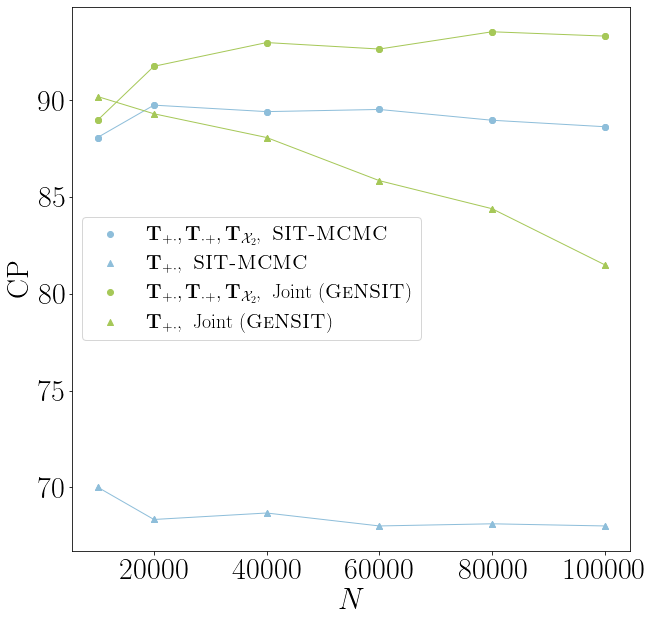

In [414]:
fig,ax = plt.subplots(figsize=settings['figure_size'])
cs = ['#8ebeda', '#8ebeda', '#a6c858', '#a6c858']#'#8ebeda' '#a6c858', '#ca4a58', '#e0ad41'
markers = ['o','^','o','^']
for jindx, j in enumerate(list(range(0,len(cs)*6,6))):
    # print(jindx,(j,j+6))
    for i in range(j,j+6):
        print(i,(data_slice['label'][i]+', \;'+data_slice['newlabel'][i]).replace(", $\\sigma = 0.014$",""))
        _ = ax.scatter(
            list(map(int,data_slice['newx']))[i],
            100*(np.log(data_slice['marker_size'][i])+2)/8,
            linewidth = 1.0,
            alpha=1.0,
            c = cs[jindx],
            marker = markers[jindx],
            label = (data_slice['label'][i]+', \;'+data_slice['newlabel'][i]).replace(", $\\sigma = 0.014$",""),
        )
    _ = ax.plot(
        list(map(int,data_slice['newx']))[slice(j,j+6)],
        100*(np.log(data_slice['marker_size'][slice(j,j+6)])+2)/8,
        linewidth = 1.0,
        c = cs[jindx],
        marker = markers[jindx]
    )
ax.tick_params(labelsize=fontsize)
plt.xlabel(r'$N$',fontsize=fontsize)
plt.ylabel(r'CP',fontsize=fontsize)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
_ = plt.legend(by_label.values(), by_label.keys(),fontsize=20)
# fig.tight_layout(rect=(0, 0, 0.7, 1.1))
plt.show()
write_figure(fig,cpoutputpath,filename_ending=settings['filename_ending'],figure_format='pdf')

## Import samples

In [367]:
# Specify experiment id
experiment_id = "GBRT_Comparison_UnsetNoise__doubly_and_cell_constrained_25_04_2024_18_41_52"
# Specify experiment group id
dataset = 'DC'
#'DC'
#'cambridge_work_commuter_lsoas_to_msoas'
#'sioux_falls'
experiment_group_id = 'comparisons'
# 'r_squared'
# 'exp1'
# 'comparisons'
experiment_dir = f'../data/outputs/{dataset}/{experiment_group_id}/{experiment_id}/'
relative_experiment_dir = os.path.relpath(experiment_dir,os.getcwd())

# Create new logging object
logger = setup_logger(
    __name__,
    console_level = 'PROGRESS',
    file_level = 'EMPTY'
)

In [13]:
# Output processing settings
settings = {
    "logging_mode": "PROGRESS",
    "coordinate_slice": [
        # "da.loss_name.isin([str(['dest_attraction_ts_likelihood_loss']),str(['dest_attraction_ts_likelihood_loss', 'table_likelihood_loss']),str(['table_likelihood_loss'])])"
        # "da.loss_name == str(['dest_attraction_ts_likelihood_loss'])",
        # "da.cost_matrix == 'cost_matrix_max_normalised.txt'"
    ],
    # "coordinate_slice": [
    #     "da.destination_attraction_ts == 'destination_attraction_housing_units_ts_sum_normalised.txt'",
    #     "da.cost_matrix == 'cost_matrix_sum_normalised.txt'",
    #     "da.title == '_row_constrained'",
    #     "da.bmax == 1.0"
    #     # "da.loss_name == str(['dest_attraction_ts_likelihood_loss'])",
    #     # "~da.title.isin([str('_unconstrained'), str('_total_constrained')])"
    # ],
    "metadata_keys":[],
    "burnin_thinning_trimming": [],
    # "burnin_thinning_trimming": [{'iter': {"burnin":10000, "thinning":90, "trimming":1000}}],
    "n_workers": 1,
    "group_by":[],
    "filename_ending":"test",
    "sample":["intensity"],
    "force_reload":False
}

In [14]:
# Initialise outputs
current_sweep_outputs = Outputs(
    config = os.path.join(relative_experiment_dir,"config.json"),
    settings = settings,
    inputs = None,
    slice = True,
    level = 'INFO'
)
# Silence outputs
# current_sweep_outputs.logger.setLevels(console_level='EMPTY')
# Load all data
current_sweep_outputs.load()

print(len(current_sweep_outputs.data),'experiments matched')

1 experiments matched


In [ ]:
# conf = Config(
#     path = os.path.join(relative_experiment_dir,"config.json")
# )
# ins = Inputs(
#     config = conf
# )
# ins.cast_to_xarray()

# $R^2$ analysis

In [ ]:
sweep_outputs_slices = []
for i in tqdm(range(len(current_sweep_outputs.data)),leave=False,desc='Finding best R2 experiments'):
    current_sweep_outputs_slice = current_sweep_outputs.get(i)
    current_r2 = current_sweep_outputs_slice.data.r2
    if np.max(current_r2) > 0.6:
        sweep_outputs_slices.append(current_sweep_outputs_slice)
print(len(sweep_outputs_slices),'experiments kept')

In [ ]:
# index = 15
# sweep_outputs_slice = sweep_outputs_slices[index]

In [ ]:
# data_index = 0
# sweep_outputs_slice = current_sweep_outputs.get(data_index)

In [ ]:
r2 = sweep_outputs_slice.data.r2
alpha_range = current_sweep_outputs.config['experiments'][0]['grid_ranges']['alpha']
r2['alpha_range'] = np.linspace(alpha_range['min'],alpha_range['max'],alpha_range['n'],endpoint=True)
r2['alpha_range'] = r2['alpha_range'].values
beta_range = current_sweep_outputs.config['experiments'][0]['grid_ranges']['beta']
r2['beta_range'] = np.linspace(beta_range['min'],beta_range['max'],beta_range['n'],endpoint=True)
r2['beta_range'] = r2['beta_range'].values
r2.coords

In [ ]:
argmax_index = np.unravel_index(np.argmax(r2.values.squeeze()), np.shape(r2.values.squeeze()))
plt.figure(figsize=(20,20))
plt.imshow(r2, cmap='RdYlGn', interpolation='nearest')
plt.scatter(argmax_index[1],argmax_index[0],marker='x',color='black',s=500)
plt.yticks(ticks=range(len(r2['alpha_range'])),labels=np.round(r2['alpha_range'].values,2))
plt.ylabel('alpha')
plt.xticks(ticks=range(len(r2['beta_range'])),labels=np.round(r2['beta_range'].values,2))
plt.xlabel('beta')
for i in range(len(r2['alpha_range'])):
    for j in range(len(r2['beta_range'])):
        plt.text(j,i,s=np.round(r2.squeeze().values[i,j],2),fontsize=8)
plt.show()

# SIM Analysis

In [16]:
index = 0
current_data = current_sweep_outputs.get(index)
print('# Sweeps:',len(current_sweep_outputs.data))
print(current_data.data.intensity.coords.items())

# Sweeps: 1
ItemsView(Coordinates:
  * origin       (origin) int16 1 2 3 4 5 6 7 8 ... 173 174 175 176 177 178 179
  * destination  (destination) int16 1 2 3 4 5 6 7 ... 174 175 176 177 178 179
  * id           (id) object MultiIndex
  * iter         (id) int32 1)


In [17]:
ins = Inputs(
    config = current_data.config
)
ins.cast_to_xarray()
test_cells = read_file('../data/inputs/DC/test_cells.txt').astype('int32')
train_cells = read_file('../data/inputs/DC/train_cells.txt').astype('int32')

In [21]:
all_table_error = srmse(
    prediction = current_data.data.table.mean('id',dtype='float64'),
    ground_truth = ins.data.ground_truth_table
)
train_table_error = srmse(
    prediction = current_data.data.table.mean('id',dtype='float64'),
    ground_truth = ins.data.ground_truth_table,
    cells = train_cells
)
test_table_error = srmse(
    prediction = current_data.data.table.mean('id',dtype='float64'),
    ground_truth = ins.data.ground_truth_table,
    cells = test_cells
)

In [ ]:
print(
    all_table_error.values.squeeze().item(),
    train_table_error.values.squeeze().item(),
    test_table_error.values.squeeze().item()
)

In [22]:
all_intensity_error = srmse(
    prediction = current_data.get_sample('intensity').mean('id',dtype='float64'),
    ground_truth = ins.data.ground_truth_table
)
train_intensity_error = srmse(
    prediction = current_data.get_sample('intensity').mean('id',dtype='float64'),
    ground_truth = ins.data.ground_truth_table,
    cells = train_cells
)
test_intensity_error = srmse(
    prediction = current_data.get_sample('intensity').mean('id',dtype='float64'),
    ground_truth = ins.data.ground_truth_table,
    cells = test_cells
)

In [23]:
print(
    all_intensity_error.values.squeeze().item(),
    train_intensity_error.values.squeeze().item(),
    test_intensity_error.values.squeeze().item()
)

2.667843536404041 0.0 2.297288107211039


In [ ]:
all_table_cp = coverage_probability(
    prediction = current_data.data.table,
    ground_truth = ins.data.ground_truth_table,
    region_mass = 0.95
)
train_table_cp = coverage_probability(
    prediction = current_data.data.table,
    ground_truth = ins.data.ground_truth_table,
    region_mass = 0.95,
    cells = train_cells
)
test_table_cp = coverage_probability(
    prediction = current_data.data.table,
    ground_truth = ins.data.ground_truth_table,
    region_mass = 0.95,
    cells = test_cells
)


In [ ]:
all_cp = all_table_cp
test_cp = train_table_cp
test_cp = test_table_cp

In [ ]:
print(
    all_table_cp.mean(['origin','destination'],skipna=True).values.item(),
    train_table_cp.mean(['origin','destination'],skipna=True).values.item(),
    test_table_cp.mean(['origin','destination'],skipna=True).values.item()
)

In [ ]:
all_intensity_cp = coverage_probability(
    prediction = current_data.get_sample('intensity'),
    ground_truth = ins.data.ground_truth_table,
    region_mass = 0.95
)
train_intensity_cp = coverage_probability(
    prediction = current_data.get_sample('intensity'),
    ground_truth = ins.data.ground_truth_table,
    region_mass = 0.95,
    cells = train_cells
)
test_intensity_cp = coverage_probability(
    prediction = current_data.get_sample('intensity'),
    ground_truth = ins.data.ground_truth_table,
    region_mass = 0.95,
    cells = test_cells
)

In [ ]:
print(
    all_intensity_cp.mean(['origin','destination'],skipna=True).values.item(),
    train_intensity_cp.mean(['origin','destination'],skipna=True).values.item(),
    test_intensity_cp.mean(['origin','destination'],skipna=True).values.item()
)

In [ ]:
_ = plt.scatter(
    np.exp(current_data.data.log_destination_attraction).mean('id').values.squeeze(),
    ins.data.destination_attraction_ts.squeeze()
)
plt.xlabel("Predictions")
plt.ylabel("Data")

In [ ]:
_ = plt.hist(current_data.data.alpha.squeeze().values,bins=30)
plt.xlabel('alpha')

In [ ]:
_ = plt.hist(current_data.data.beta.squeeze().values,bins=30)
plt.xlabel('beta')

In [ ]:
_ = plt.hist2d(
    current_data.data.beta.squeeze().values,
    current_data.data.alpha.squeeze().values,
    bins = 30
)
plt.ylabel('alpha')
plt.xlabel('beta')